DataFrame Shape :  (126, 12)
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 12 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Timestamp                                                                            126 non-null    object
 1   What is your ideal age group?                                                        126 non-null    object
 2   What is your current marital status?                                                 126 non-null    object
 3   What's your plan on weekends?                                                        126 non-null    object
 4   What type of retail products are you most interested in? (Select all that apply)     126 non-null    object
 5   What factors influence your purchasing decisions when i

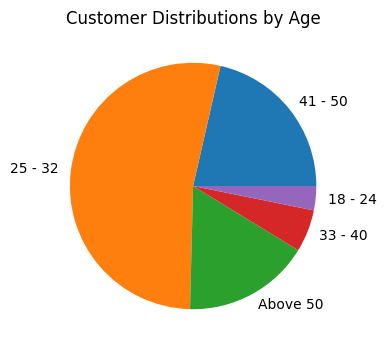

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("/content/drive/MyDrive/DeepForecast/DataCollected/Retail_Customer_Survey.csv")

def describeCollectedData(df):
    print(f'DataFrame Shape : ',df.shape)
    print(f'DataFrame Info')
    print(df.info())
    df.dropna()
    df.dropna(axis=1)
    print(f'DataFrame Shape after droping null values : ',df.shape)
    return df

data_df = describeCollectedData(data_df)

def preprocessingCollectedData(df):
    df = df.drop(['Timestamp','What needs to be improved in our retail shops?'], axis=1)
    df.rename(columns={'What is your ideal age group?':'Age_Group',
                  'What is your current marital status?':'Marital_Status',
                  "What's your plan on weekends?":'Weekedn_Plan',
                  'What type of retail products are you most interested in? (Select all that apply)':'Interested_ProductType',
                  'What factors influence your purchasing decisions when it comes to retail products? ':'Influencing_Factor',
                  'Choose preferred mode of shopping':'Mode_Of_ShoppingProducts',
                  'Are you interested in sports? If yes, which sports are you most interested in?':'Interested_SportType',
                  'How often do you participate in sports or fitness activities?':'Frequency_Of_FitnessActivity',
                  'How do you typically watch movies?':'Mode_Of_WatchingMovies',
                  'What type of movie genres do you enjoy watching?':'Interested_MovieType'},inplace=True)
    return df

preprocessedDf = preprocessingCollectedData(data_df)
preprocessedDf.describe()

#Visualizing the PreProcessed Data

fig = plt.figure(figsize=(5, 4))
plt.pie(preprocessedDf.groupby(['Age_Group'])['Age_Group'].count(), labels=preprocessedDf['Age_Group'].unique())
plt.title("Customer Distributions by Age")
plt.show()


#Exporting the PreProcessed Data

preprocessedDf.to_csv('/content/drive/MyDrive/DeepForecast/Output/RetailCustomerSurvey_Processed.csv', encoding='utf-8', index=False, header=True)



